<a href="https://colab.research.google.com/github/yuliiabosher/Python-with-Data-course/blob/main/Worksheets/Data_Exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arrivals from Ukraine to the UK following the Russian invasion in February 2022
---



## Yuliia Bosher 12.09.2023
---



## Objectives
---

Ukrainian refugees have become a salient topic in the UK media discourse. It is important to understand the data to be able to reflect on the UK response. This could help challenge misleading or manipulative statements and devise asylum policy recommendations for other countries.

I intend to find out the total number of arrivals from Ukraine following the Russian invasion in February 2022, number of arrivals per 100,000 population, demographic breakdown, breakdown by country and local authority, compare the numbers to the UK counterparts in the EU and check correlation between arrivals from Ukraine and income deprivation level per local authority.



## The dataset
---



First, I installed all the packages needed to execute the commands.

In [ ]:
!pip install odfpy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=e64049278c9ceb9ff443872460fce4e37af0116f28e38211468a5ffcbf69736f
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


Next, I read the following dataset  https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166345/Ukraine_sponsorship_scheme_-_visa_data_27_June_2023.ods found using the link below https://www.gov.uk/guidance/ukraine-sponsorship-scheme-visa-data-by-country-upper-and-lower-tier-local-authority. I read the sheet that contained data on arrivals to 27 June 2023 on Homes for Ukraine scheme, where a member of the public offered their accommodation, and Scotland and Wales sponsorship schemes, where the newly arrived were were housed in temporary accommodation. I read four sheets in the Open Document format with each sheet corresponding to either England, Scotland, Wales or Northern Ireland with breakdown by local authority where the sponsor was a member of the public. There was also breakdown for those arriving on Scotland and Wales government schemes but no local authority listed for these schemes. I renamed columns in those four dataframes, skipped or dropped rows with explanatory notes, added a new column to each dataframe with the name of the respective UK country. I then concatenated the four dataframes into one and cleaned the new dataframe using a function that removes an asterisk and replaces it with 50. The reason for that was the fact that an asterisk represented numbers less than 50. The function also converted strings into floats. There were only 2 local authorities out of 373 where there were less than 50 arrivals and therefore the results were affected were marginally and would differ by 100 in total at most. In another dataframe on family scheme there was only one week out of 69 weeks recorded where there were less than 50 arrivals and therefore the data cleaning would only affect the data by 50 in total at most.




I then read the following dataset https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179577/ukraine-visa-schemes-summary-jun-2023-tables.ods found using the below link https://www.gov.uk/government/statistical-data-sets/immigration-system-statistics-data-tables#ukraine-visa-schemes. It contained data on arrivals to the UK with differentiation by scheme type which allowed me to separate family scheme data. I again skipped or dropped rows with explanatory notes and used the function replacing values less than 50 with 50. The function also converted the data from string to float format. I converted a column from string to datetime format. I applied the sum function to the column representing arrivals on family scheme and created a new row with this variable. I then added this row to the dataframe with data on those sponsored by a member of the public and devolved governments.
From 22nd Nov 2022, the analytical methodology to deduplicate the arrival figures at the local authority level was amended in order to align with Home Office Reporting. This would explain the discrepancy between arrival numbers published by Department for Levelling Up, Housing and Communities in the first dataset and the Home Office data on arrivals published in the second dataset.

In [ ]:
england = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166345/Ukraine_sponsorship_scheme_-_visa_data_27_June_2023.ods", sheet_name = 'LTLA_-_England', skiprows=8)
england = england.drop(england.iloc[310:].index, axis=0)
england = england.drop(0, axis=0)
england['Country'] = 'England'
england = england.rename(columns={'Lower tier local authority name': 'Local authority name'})
england = england.rename(columns={'LTLA - ONS code': 'ONS code'})
england['Scheme type'] = 'Sponsored by a member of the public'
display(england.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 1 to 309
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Local authority name                              309 non-null    object 
 1   ONS code                                          309 non-null    object 
 2   Number of visa applications                       309 non-null    float64
 3   Number of visas issued                            309 non-null    object 
 4   Number of arrivals in the UK by sponsor location  309 non-null    object 
 5   Country                                           309 non-null    object 
 6   Scheme type                                       309 non-null    object 
dtypes: float64(1), object(6)
memory usage: 17.0+ KB


None

In [ ]:
scotland = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166345/Ukraine_sponsorship_scheme_-_visa_data_27_June_2023.ods", sheet_name = 'Scotland', skiprows=10)
scotland = scotland.drop(0, axis=0)
scotland['Country'] = 'Scotland'
scotland = scotland.drop(scotland.loc[33:37].index, axis=0)
scotland = scotland.drop(scotland.loc[39:].index, axis=0)
scotland = scotland.rename(columns={'Upper tier local authority name': 'Local authority name'})
scotland['Scheme type'] = 'Sponsored by a member of the public'
scotland['Scheme type'][38] ='Sponsored by a devolved government'
display(scotland.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 38
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Local authority name                              33 non-null     object
 1   ONS code                                          32 non-null     object
 2   Number of visa applications                       33 non-null     object
 3   Number of visas issued                            33 non-null     object
 4   Number of arrivals in the UK by sponsor location  33 non-null     object
 5   Country                                           33 non-null     object
 6   Scheme type                                       33 non-null     object
dtypes: object(7)
memory usage: 3.1+ KB


None

In [ ]:
wales = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166345/Ukraine_sponsorship_scheme_-_visa_data_27_June_2023.ods", sheet_name = 'Wales', skiprows=10)
wales = wales.drop(0, axis=0)
wales = wales.drop(wales.loc[22:27].index, axis=0)
wales = wales.drop(wales.loc[29:].index, axis=0)
wales['Country'] = 'Wales'
wales = wales.rename(columns={'Upper tier local authority name': 'Local authority name'})
wales['Scheme type'] = 'Sponsored by a member of the public'
wales['Scheme type'][28] = 'Sponsored by a devolved government'
display(wales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 28
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Local authority name                              22 non-null     object
 1   ONS code                                          21 non-null     object
 2   Number of visa applications                       22 non-null     object
 3   Number of visas issued                            22 non-null     object
 4   Number of arrivals in the UK by sponsor location  22 non-null     object
 5   Country                                           22 non-null     object
 6   Scheme type                                       22 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


None

In [ ]:
ni = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1166345/Ukraine_sponsorship_scheme_-_visa_data_27_June_2023.ods", sheet_name = 'Northern_Ireland', skiprows=8)
ni = ni.drop(0, axis=0)
ni = ni.drop(ni.loc[12:].index, axis=0)
ni['Country'] = 'Northern Ireland'
ni = ni.rename(columns={'Numbers of visa applications': 'Number of visa applications'})
ni['Scheme type'] = 'Sponsored by a member of the public'
display(ni.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 1 to 11
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Local authority name                              11 non-null     object 
 1   ONS code                                          11 non-null     object 
 2   Number of visa applications                       11 non-null     float64
 3   Number of visas issued                            11 non-null     float64
 4   Number of arrivals in the UK by sponsor location  11 non-null     float64
 5   Country                                           11 non-null     object 
 6   Scheme type                                       11 non-null     object 
dtypes: float64(3), object(4)
memory usage: 748.0+ bytes


None

In [ ]:
uk = pd.concat([england, scotland, wales, ni], ignore_index=True)
def asterisk(x):
  if x == '*':
    return 0
  else:
    return x
uk['Number of arrivals in the UK by sponsor location'] = uk['Number of arrivals in the UK by sponsor location'].apply(asterisk)
uk['Number of visas issued'] = uk['Number of visas issued'].apply(asterisk)
uk['Number of visa applications'] = uk['Number of visa applications'].apply(asterisk)
uk = uk.rename(columns = {'Number of visa applications': 'Applications', 'Number of visas issued': 'Visas', 'Number of arrivals in the UK by sponsor location': 'Arrivals'})
display(uk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Local authority name  375 non-null    object 
 1   ONS code              373 non-null    object 
 2   Applications          375 non-null    float64
 3   Visas                 375 non-null    float64
 4   Arrivals              375 non-null    float64
 5   Country               375 non-null    object 
 6   Scheme type           375 non-null    object 
dtypes: float64(3), object(4)
memory usage: 20.6+ KB


None

In [ ]:
family = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179577/ukraine-visa-schemes-summary-jun-2023-tables.ods", sheet_name = "UVS_03", skiprows=1)
family = family.drop(family.iloc[69:].index, axis=0)
def less_50(x):
  if x['Ukraine Family Scheme Arrivals'] == 'Less than 50':
    return 50
  else:
    return x['Ukraine Family Scheme Arrivals']
family['Ukraine Family Scheme Arrivals'] = family.apply(less_50, axis=1)
def z(x):
  if x['Ukraine Sponsorship Scheme Arrivals'] == 'z':
    return 0
  else:
    return x['Ukraine Sponsorship Scheme Arrivals']
family['Ukraine Sponsorship Scheme Arrivals'] = family.apply(z, axis=1)
def total(x):
  if x['Total Arrivals'] == 'Less than 50':
    return 50
  else:
    return x['Total Arrivals']
family['Total Arrivals'] = family.apply(total, axis=1)
family['Week Ending'] = pd.to_datetime(family['Week Ending'])
display(family.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Week Ending                          69 non-null     datetime64[ns]
 1   Ukraine Family Scheme Arrivals       69 non-null     int64         
 2   Ukraine Sponsorship Scheme Arrivals  69 non-null     int64         
 3   Total Arrivals                       69 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.3 KB


None

In [ ]:
family_scheme_total = family['Ukraine Family Scheme Arrivals'].sum()
new_row = ['n/a', None, 'n/a', 'n/a', family_scheme_total, None, 'Sponsored by a family member']
uk.loc[len(uk)] = new_row
display(uk.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 375
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Local authority name  376 non-null    object 
 1   ONS code              373 non-null    object 
 2   Applications          376 non-null    object 
 3   Visas                 376 non-null    object 
 4   Arrivals              376 non-null    float64
 5   Country               375 non-null    object 
 6   Scheme type           376 non-null    object 
dtypes: float64(1), object(6)
memory usage: 23.5+ KB


None

I stored data on total arrivals and week of arrival in new variables and plotted a line chart showing how the number of arrivals on all schemes varied over time.

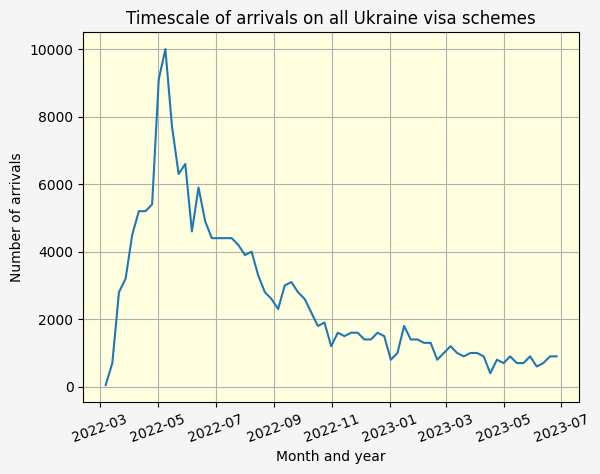

In [ ]:
total_arrivals = family['Total Arrivals']
week = family['Week Ending']
fig, axs = plt.subplots(facecolor='whitesmoke')
plt.plot(week, total_arrivals)
plt.xticks(rotation = 20)
plt.title('Timescale of arrivals on all Ukraine visa schemes')
plt.xlabel('Month and year')
plt.ylabel('Number of arrivals')
plt.grid()
axs.set_facecolor('lightyellow')
plt.show()

The line chart demonstrates that arrivals on all schemes surged in spring 2022, gradually descreasing and flatlining after November 2022 to date.

I grouped the data by scheme type and plotted a bar chart with slices representing a share of each scheme. I created a function that would show the number of arrivals on each scheme as a second label along with the scheme name and applied it to the chart.

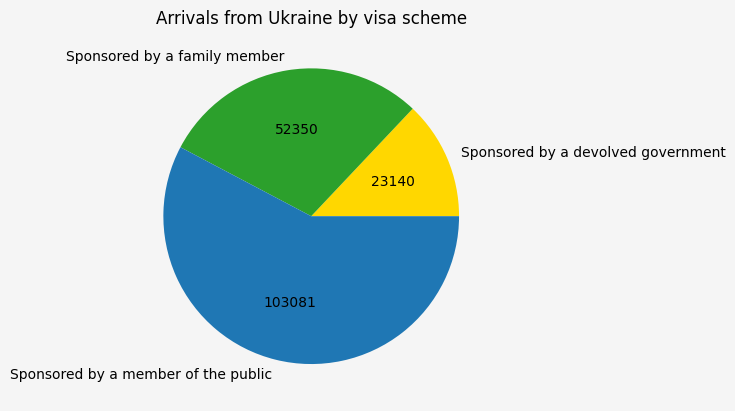

In [ ]:
scheme_total = uk.groupby('Scheme type').sum(numeric_only = True).sort_values('Arrivals')
data_scheme = scheme_total['Arrivals']
labels_scheme = data_scheme.keys()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{v}'.format(v=val)
        return my_format
fig, axs = plt.subplots(facecolor='whitesmoke')
plt.pie(data_scheme, labels = labels_scheme, autopct = autopct_format(data_scheme), colors=['gold', 'tab:green', 'tab:blue'])
plt.title("Arrivals from Ukraine by visa scheme")
plt.show()

The chart demonstrated that the vast majority of the arrivals from Ukraine to date have been sponsored by a member of public, smaller share have been sponsored by a UK family member and the smallest share comprise those sponsored by the devolved governments of Scotland and Wales.

I then read the dataset https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179577/ukraine-visa-schemes-summary-jun-2023-tables.ods found using the below link https://www.gov.uk/government/statistical-data-sets/immigration-system-statistics-data-tables#ukraine-visa-schemes, this time the sheet on demographic breakdown. I dropped rows with explanatory notes, renamed columns, assigned certain cells integer values instead of string, transposed the table and created two dataframes corresponding to age and sex. I then plotted two pie charts corresponding to age breakdown and sex breakdown among working age arrivals.

In [ ]:
demographic = pd.read_excel("https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1179577/ukraine-visa-schemes-summary-jun-2023-tables.ods", sheet_name= 'UVS_04')
demographic=demographic.rename(columns={'UVS_04: Demographic (age/sex) breakdown for those arriving on Ukraine Schemes as at 30 June 2023 [Note 1]': 'Age/sex breakdown', 'Unnamed: 1': 'U18', 'Unnamed: 2': '18-64', 'Unnamed: 3': '65+'})
demographic=demographic.drop(demographic.loc[1:6].index)
demographic=demographic.drop(demographic.loc[9:].index)
demographic=demographic.drop('Unnamed: 4', axis=1)
demographic['U18'][7] = 25700
demographic['U18'][8] = 25100
demographic['18-64'][7] = 33500
demographic['18-64'][8] = 85600
demographic['65+'][7] = 3000
demographic['65+'][8] = 6500
display(demographic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 8
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age/sex breakdown  2 non-null      object
 1   U18                3 non-null      object
 2   18-64              3 non-null      object
 3   65+                3 non-null      object
dtypes: object(4)
memory usage: 228.0+ bytes


None

In [ ]:
age = demographic.T
age = age.rename(columns={0: 'Age group'})
age = age.drop('Age/sex breakdown', axis=0)
age['Arrivals'] = age[7] + age[8]
age = age.drop(7, axis=1)
age = age.drop(8, axis=1)
display(age.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, U18 to 65+
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age group  3 non-null      object
 1   Arrivals   3 non-null      object
dtypes: object(2)
memory usage: 72.0+ bytes


None

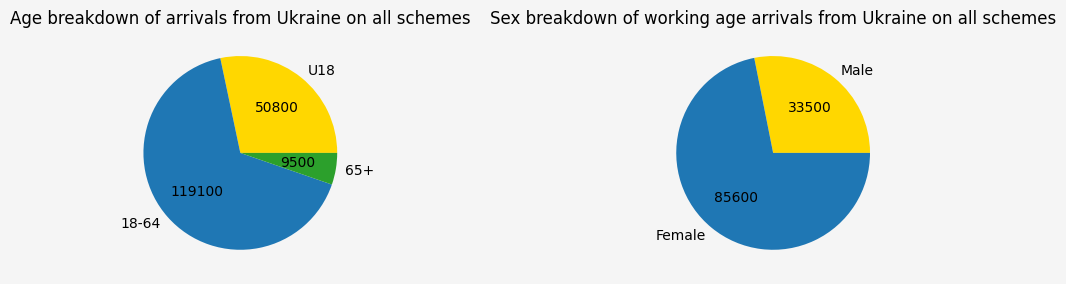

In [ ]:
age_data = age['Arrivals']
age_labels = age['Age group']
fig, axs = plt.subplots(1, 2, figsize=(10,10), facecolor='whitesmoke')
fig.subplots_adjust(wspace=1.2)
axs[0].pie(age_data, labels = age_labels, autopct = autopct_format(age_data), colors=['gold', 'tab:blue', 'tab:green'])
axs[0].set_title('Age breakdown of arrivals from Ukraine on all schemes')
sex = demographic.T
sex = sex.rename(columns={7: 'Male', 8: 'Female'})
sex = sex.drop('Age/sex breakdown', axis=0)
sex = sex.drop(0, axis=1)
sex_data = sex.loc['18-64']
sex_labels = sex.loc['18-64'].keys()
axs[1].pie(sex_data, labels=sex_labels, autopct = autopct_format(sex_data), colors=['gold', 'tab:blue'])
axs[1].set_title('Sex breakdown of working age arrivals from Ukraine on all schemes')
plt.show()

The first subplot demonstrates that roughly two thirds of people from Ukraine who arrived on Ukraine visa schemes were between the ages of 18 and 64, roughly a third were children and only a small share were over 65 years old. The second subplot shows that roughtly three quarters of working age arrivals were women and around a quarter were men.

I dropped n/a rows in the Country column in the previously created dataframe with concatenated data on all schemes to keep data on arrivals sponsored by a member of the public and devolved governments since family scheme data was not tied to a specific country. I grouped the dataframe by country and sorted arrivals values in descending order. From this I separated arrivals column and created the data variable and the label variable to be plotted. I then used the earlier created concatenated dataframe to drop n/a rows in the ONS code column to keep only the data on arrivals sponsored by a member of the public since family scheme and devolved governemnts' schemes were not associated with an ONS code. I then grouped this by country and sorted it by arrivals in descending order. I then separated the arrivals data and arrivals labels to be plotted on a second pie chart. I created a plot with two pie chart subplots showing the difference in each country's share for arrivals sponsored by a member of the public only and by both a member of the public and devolved governments. I reused the function I created earlier to show two labels per slice.

In [ ]:
public_gov = uk.dropna(subset='Country')
public_gov_grouped = public_gov.groupby('Country').sum(numeric_only=False).sort_values('Arrivals', ascending=False)
data_public_gov = public_gov_grouped['Arrivals']
labels_public_gov = public_gov_grouped['Arrivals'].keys()
members_of_public = uk.dropna(subset = 'ONS code')
display(members_of_public.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Local authority name  373 non-null    object 
 1   ONS code              373 non-null    object 
 2   Applications          373 non-null    object 
 3   Visas                 373 non-null    object 
 4   Arrivals              373 non-null    float64
 5   Country               373 non-null    object 
 6   Scheme type           373 non-null    object 
dtypes: float64(1), object(6)
memory usage: 23.3+ KB


None

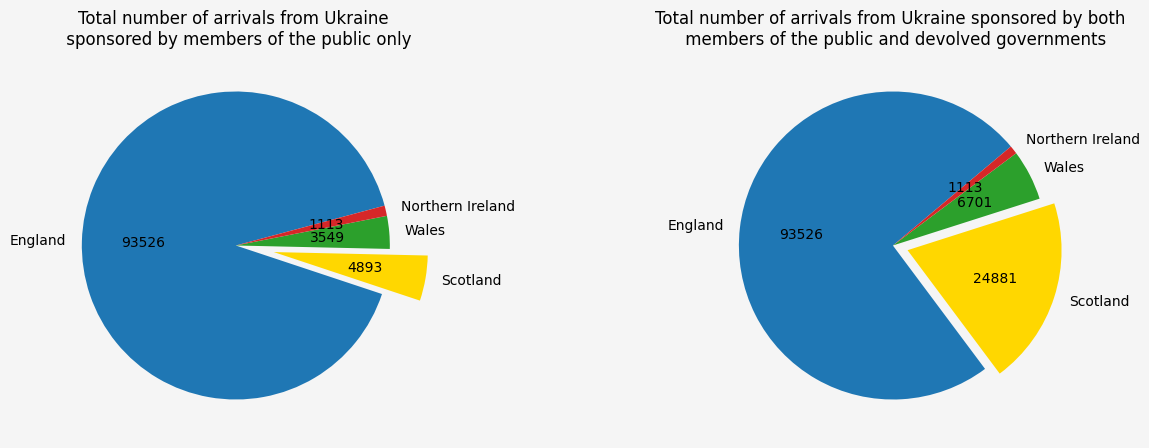

In [ ]:
public = members_of_public.groupby('Country').sum(numeric_only=False).sort_values('Arrivals', ascending=False)
public_data = public['Arrivals']
public_labels = public['Arrivals'].keys()
fig, axs = plt.subplots(1,2, figsize=(15,5), facecolor='whitesmoke')
fig.subplots_adjust(wspace=0.3)
axs[1].pie(data_public_gov, labels=labels_public_gov, autopct = autopct_format(data_public_gov), explode = [0, 0.1, 0, 0], startangle=40, colors=['tab:blue', 'gold', 'tab:green', 'tab:red'])
axs[1].set_title('Total number of arrivals from Ukraine sponsored by both \n members of the public and devolved governments')
axs[0].pie(public_data, labels=public_labels, autopct = autopct_format(public_data), explode = [0, 0.25, 0, 0], startangle=15, colors=['tab:blue', 'gold', 'tab:green', 'tab:red'])
axs[0].set_title('Total number of arrivals from Ukraine \n sponsored by members of the public only')
plt.show()

The two sublots demonstrate the contrast between the number of arrivals sponsored by a member of the public and those sponsored by both members of the public and devolved governments. Scotland increased the number of arrivals five times due to the governemnt scheme while arrivals in Wales doubled.

I read the excel file that could be downloaded via the following link https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland/mid2021/ukpopestimatesmid2021on2021geographyfinal.xls that could be found on the following page https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland. I uploaded this file on my github account and read it as a github link because the ONS website would not allow it to be read from there. I read the sheet that contained data on the population estimates of England, Scotland, Wales and Northern Ireland. I dropped rows that did not contain the above information and renamed columns of that dataframe. I used the earlier contactenated dataframe with data on arrivals on all schemes to create a new dataframe with data grouped by country, summed and sorted by arrivals. This allowed me to separate data on arrivals in each country when sponsored by a member of the public and the devolved governments. I created a dictionary with keys as country names and values as a product of division of a country's sum of arrivals by population estimate of that country multiplied by 100,000. This allowed me calculate the number of arrivals per 100,000 population by country when sponsored by both members of the public and by the devolved governments. I turned that dictionary into a dataframe. I performed the same actions on another dataframe that contained data on arrivals sponsored by members of the public only. I then plotted the data from the two resulting dataframes on a plot with two bar chart subplots.

In [ ]:
population = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name = 'MYE1')
population = population.drop('Unnamed: 1', axis=1)
population = population.drop('MYE1: Population estimates: Summary for the UK, mid-2021', axis=1)
population = population.drop('Unnamed: 2', axis=1)
population = population.drop('Unnamed: 3', axis=1)
population.columns = population.iloc[5]
population = population.drop(population.loc[:6].index, axis=0)
population = population.drop(population.loc[8:].index, axis=0)
population = population.astype(int)
display(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 7 to 7
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   England            1 non-null      int64
 1   Wales              1 non-null      int64
 2   Scotland           1 non-null      int64
 3   Northern Ireland   1 non-null      int64
dtypes: int64(4)
memory usage: 164.0 bytes


None

In [ ]:
country_total = uk.groupby('Country').sum(numeric_only = False).sort_values("Arrivals")
country_per_100K = {
    'England': [round(country_total['Arrivals']['England']/population['England'][7]*100000)],
    'Scotland':[round(country_total['Arrivals']['Scotland']/population['Scotland'][7]*100000)],
    'Wales': [round(country_total['Arrivals']['Wales']/population['Wales '][7]*100000)],
    'Northern Ireland': [round(country_total['Arrivals']['Northern Ireland']/population['Northern Ireland '][7]*100000)]
}
country_100K_df = pd.DataFrame(country_per_100K)
display(country_100K_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   England           1 non-null      int64
 1   Scotland          1 non-null      int64
 2   Wales             1 non-null      int64
 3   Northern Ireland  1 non-null      int64
dtypes: int64(4)
memory usage: 160.0 bytes


None

In [ ]:
pm_country_total = members_of_public.groupby('Country').sum(numeric_only=True)
pm_country_100K = {
    'England': [round(pm_country_total['Arrivals']['England']/population['England'][7]*100000)],
    'Scotland': [round(pm_country_total['Arrivals']['Scotland']/population['Scotland'][7]*100000)],
    'Wales': [round(pm_country_total['Arrivals']['Wales']/population['Wales '][7]*100000)],
    'Northern Ireland': [round(pm_country_total['Arrivals']['Northern Ireland']/population['Northern Ireland '][7]*100000)]
}
pm_country_100K_df = pd.DataFrame(pm_country_100K)
display(pm_country_100K_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   England           1 non-null      int64
 1   Scotland          1 non-null      int64
 2   Wales             1 non-null      int64
 3   Northern Ireland  1 non-null      int64
dtypes: int64(4)
memory usage: 160.0 bytes


None

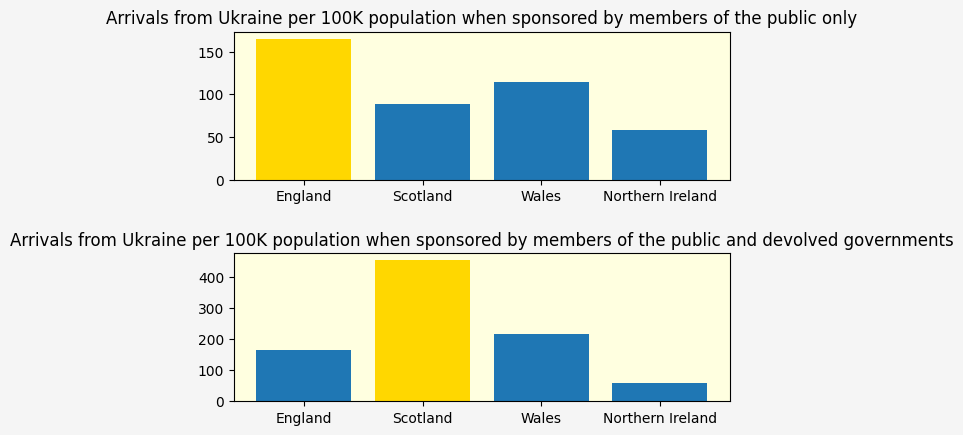

In [ ]:
fig, axs = plt.subplots(2, facecolor='whitesmoke')
axs[0].bar(pm_country_100K_df.keys(), pm_country_100K_df.iloc[0], color=['gold', 'tab:blue', 'tab:blue', 'tab:blue'])
axs[0].set_title('Arrivals from Ukraine per 100K population when sponsored by members of the public only')
axs[0].set_facecolor('lightyellow')
axs[1].bar(country_100K_df.keys(), country_100K_df.iloc[0], color=['tab:blue', 'gold', 'tab:blue', 'tab:blue'])
axs[1].set_title('Arrivals from Ukraine per 100K population when sponsored by members of the public and devolved governments')
axs[1].set_facecolor('lightyellow')
fig.subplots_adjust(hspace=0.5)
plt.show()

The two subplots demonstrate that when counting the arrivals sponsored by a member of the public England is leading among the UK countries but when we take into account the number of arrivals sponsored by both members of the public and devolved governments Scotland takes the first place followed by Wales.

I read another sheet from the dataset found on the ONS website, this time containing data on population estimates by local authority. I skipped or dropped rows with explanatory notes, created a dataframe with local authority code and population columns only, renamed the columns. I then performed an inner join operation with the dataframe on arrivals sponsored by members of the public only using the ONS code column as a key. I created a new column in this joined dataframe with values being the result of division of the number of arrivals by the population estimate and multiplied by 100,000. This allowed me to find the number of arrivals per 100,000 population by local authority when sponsored by a member of the public. I then plotted a chart with 8 bar chart subplots separated into 2 columns. The first column represents the top 5 local authorities by total number of arrivals in each country and the second column shows the top 5 local authorities by number of arrivals per 100,000 population in each country.

In [ ]:
county_population = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name = 'MYE2 - Persons', skiprows=7)
county_df = county_population[['Code', 'All ages']]
county_df = county_df.rename(columns={'Code': 'ONS code'})
county_joined = members_of_public.join(county_df.set_index('ONS code'), on='ONS code', how='inner')
county_joined = county_joined.rename(columns={'All ages': 'Population'})
county_joined['Arrivals per 100K'] = round(county_joined['Arrivals']/county_joined['Population']*100000).astype(int)
display(county_joined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Local authority name  373 non-null    object 
 1   ONS code              373 non-null    object 
 2   Applications          373 non-null    object 
 3   Visas                 373 non-null    object 
 4   Arrivals              373 non-null    float64
 5   Country               373 non-null    object 
 6   Scheme type           373 non-null    object 
 7   Population            373 non-null    int64  
 8   Arrivals per 100K     373 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB


None

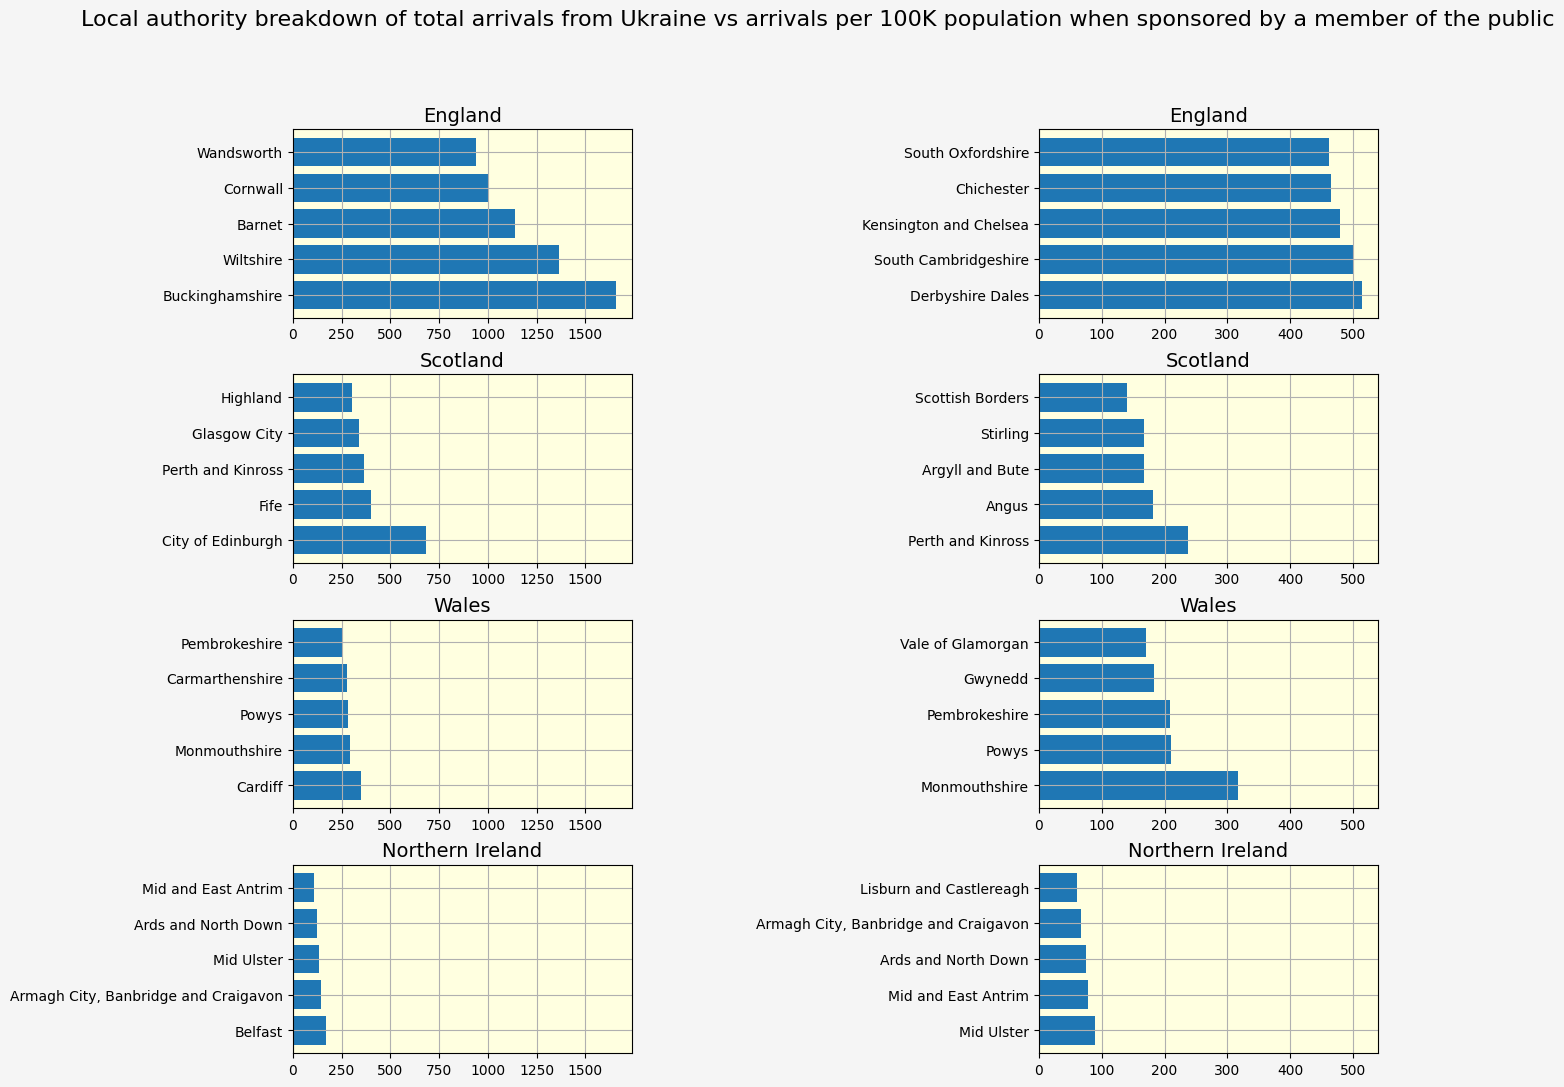

In [ ]:
xe = county_joined[county_joined['Country'] == 'England'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
ye = county_joined[county_joined['Country'] == 'England'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xs = county_joined[county_joined['Country'] == 'Scotland'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
ys = county_joined[county_joined['Country'] == 'Scotland'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xw = county_joined[county_joined['Country'] == 'Wales'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
yw = county_joined[county_joined['Country'] == 'Wales'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
xi = county_joined[county_joined['Country'] == 'Northern Ireland'].sort_values('Arrivals per 100K', ascending=False).head()['Local authority name']
yi = county_joined[county_joined['Country'] == 'Northern Ireland'].sort_values('Arrivals per 100K', ascending=False).head()['Arrivals per 100K']
x1 = members_of_public[members_of_public['Country'] == 'England'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y1 = members_of_public[members_of_public['Country'] == 'England'].sort_values('Arrivals', ascending=False).head()['Arrivals']
x2 = members_of_public[members_of_public['Country'] == 'Scotland'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y2 = members_of_public[members_of_public['Country'] == 'Scotland'].sort_values('Arrivals', ascending=False).head()['Arrivals']
x3 = members_of_public[members_of_public['Country'] == 'Wales'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y3 = members_of_public[members_of_public['Country'] == 'Wales'].sort_values('Arrivals', ascending=False).head()['Arrivals']
x4 = members_of_public[members_of_public['Country'] == 'Northern Ireland'].sort_values('Arrivals', ascending=False).head()['Local authority name']
y4 = members_of_public[members_of_public['Country'] == 'Northern Ireland'].sort_values('Arrivals', ascending=False).head()['Arrivals']
fig, axs = plt.subplots(4,2, sharex='col', figsize=(14,12), facecolor='whitesmoke')
fig.subplots_adjust(hspace=0.3, wspace=1.2)
fig.suptitle('Local authority breakdown of total arrivals from Ukraine vs arrivals per 100K population when sponsored by a member of the public', fontsize=16)
axs[0,1].barh(xe, ye)
axs[0,1].set_title('England', fontsize=14)
axs[0,1].xaxis.set_tick_params(labelbottom=True)
axs[0,1].grid()
axs[0,1].set_facecolor('lightyellow')
axs[1,1].barh(xs, ys)
axs[1,1].set_title('Scotland', fontsize=14)
axs[1,1].xaxis.set_tick_params(labelbottom=True)
axs[1,1].grid()
axs[1,1].set_facecolor('lightyellow')
axs[2,1].barh(xw, yw)
axs[2,1].set_title('Wales', fontsize=14)
axs[2,1].xaxis.set_tick_params(labelbottom=True)
axs[2,1].grid()
axs[2,1].set_facecolor('lightyellow')
axs[3,1].barh(xi, yi)
axs[3,1].set_title('Northern Ireland', fontsize=14)
axs[3,1].xaxis.set_tick_params(labelbottom=True)
axs[3,1].grid()
axs[3,1].set_facecolor('lightyellow')
axs[0,0].barh(x1, y1)
axs[0,0].set_title('England', fontsize=14)
axs[0,0].xaxis.set_tick_params(labelbottom=True)
axs[0,0].grid()
axs[0,0].set_facecolor('lightyellow')
axs[1,0].barh(x2, y2)
axs[1,0].set_title('Scotland', fontsize=14)
axs[1,0].xaxis.set_tick_params(labelbottom=True)
axs[1,0].grid()
axs[1,0].set_facecolor('lightyellow')
axs[2,0].barh(x3,y3)
axs[2,0].set_title('Wales', fontsize=14)
axs[2,0].xaxis.set_tick_params(labelbottom=True)
axs[2,0].grid()
axs[2,0].set_facecolor('lightyellow')
axs[3,0].barh(x4,y4)
axs[3,0].grid()
axs[3,0].set_title('Northern Ireland', fontsize=14)
axs[3,0].xaxis.set_tick_params(labelbottom=True)
axs[3,0].set_facecolor('lightyellow')
plt.show()

The two columns of subplots demonstrate the difference between top local authorities by arrivals in each UK country when sponsored by a member of the public. In both absolute and relative to population numbers the top local authorities in England are way ahead of Scotland, Wales and Northern Ireland. When we compare a country's top 5 local authorities for total number of arrivals and its top local authorities for arrivals relative to population we can see that they are not the same. While the top local authorities for total arrivals tended to be in capital cities, the top local authorities relative to population tended to be outside of capitals and outside of major cities.

I created a plot with 5 subplots, one of them being a boxplot summarising statistics on arrivals per 100,000 across the UK and the other 4 being histograms on arrivals per 100,000 population by local authority in each UK country.

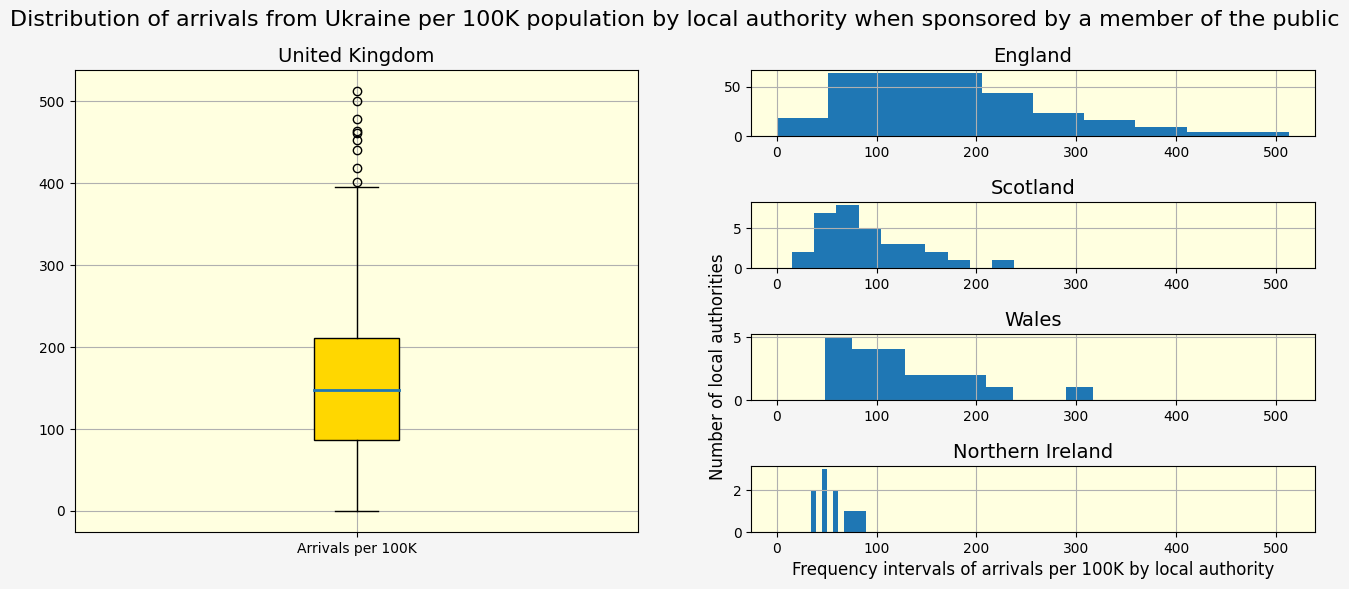

In [ ]:
e = county_joined[county_joined['Country'] == 'England']['Arrivals per 100K']
s = county_joined[county_joined['Country'] == 'Scotland']['Arrivals per 100K']
w = county_joined[county_joined['Country'] == 'Wales']['Arrivals per 100K']
i = county_joined[county_joined['Country'] == 'Northern Ireland']['Arrivals per 100K']
fig = plt.figure(facecolor='whitesmoke')
fig.set_figheight(6)
fig.set_figwidth(16)
fig.subplots_adjust(hspace=1)
fig.suptitle('Distribution of arrivals from Ukraine per 100K population by local authority when sponsored by a member of the public', fontsize=16)
ax1 = plt.subplot2grid(shape=(4, 2), loc=(0, 1))
ax2 = plt.subplot2grid(shape=(4, 2), loc=(1, 1), sharex=ax1)
ax3 = plt.subplot2grid(shape=(4, 2), loc=(2, 1), sharex=ax1)
ax4 = plt.subplot2grid(shape=(4, 2), loc=(3, 1), sharex=ax1)
ax5 = plt.subplot2grid(shape=(4, 2), loc=(0, 0), rowspan=4)
ax1.hist(e)
ax1.set_title('England', fontsize=14)
ax1.xaxis.set_tick_params(labelbottom=True)
ax1.grid()
ax1.set_facecolor('lightyellow')
ax2.hist(s)
ax2.xaxis.set_tick_params(labelbottom=True)
ax2.set_title('Scotland', fontsize=14)
ax2.grid()
ax2.set_facecolor('lightyellow')
ax3.hist(w)
ax3.set_title('Wales', fontsize=14)
ax3.xaxis.set_tick_params(labelbottom=True)
ax3.set_ylabel('Number of local authorities', fontsize=12)
ax3.grid()
ax3.set_facecolor('lightyellow')
ax4.hist(i)
ax4.set_title('Northern Ireland', fontsize=14)
ax4.xaxis.set_tick_params(labelbottom=True)
ax4.set_xlabel('Frequency intervals of arrivals per 100K by local authority', fontsize=12)
ax4.grid()
ax4.set_facecolor('lightyellow')
ax5.boxplot(county_joined['Arrivals per 100K'], labels=['Arrivals per 100K'], patch_artist=True, boxprops=dict(facecolor='gold'), medianprops = dict(color="tab:blue", linewidth=2))
ax5.set_title('United Kingdom', fontsize=14)
ax5.grid()
ax5.set_facecolor('lightyellow')
plt.show()

The boxplot chart demontsrates that the median of arrivals per 100,000 population per local authority in the UK when sponsored by a public member is around 150 mark while the three quarters of these arrivals are approxiamtely 100 to 200 people per local authority. This is also reflected in the histograms showing arrivals sponsored by public members per local authority by UK country with Northern Ireland being the outlier with all arrivals being under 100 people mark.

I read a Github link to a csv file that I downloaded from the following webpage https://european-union.europa.eu/principles-countries-history/key-facts-and-figures/life-eu_en because it was restricted from being read using Python. I then read a Github link to a file that I generated and downloaded using the following link https://ec.europa.eu/eurostat/databrowser/view/MIGR_ASYTPSM__custom_7288815/bookmark/table?lang=en&bookmarkId=71bfc663-5c98-4eb8-b490-0061c37212f9. It contained data on beneficiaries of temporary protection in the EU which corresponds to arrivals from Ukraine following the Russian invasion. I skipped explanatory top rows and dropped rows with 4 EEA countries that do not belong to the EU. I renamed columns and converted strings into integers. I created a new column with arrivals to the EU per 100,000 population. I calculated a result of the division of the number of arrivals to the UK by the UK population estimate multiplied by 100,000 and assigned it to a new variable. I created a dictionary with data on the UK population, total arrivals fom Ukraine, arrivals per 100,000 population and turned it into a dataframe. I then concatenated it with the dataframe on arrivals to the EU. I sorted the resulting dataframe by arrivals per 100,000 population. I then created a plot with two subplots. The first one is a bar chart with total arrivals from Ukraine to the EU countries and the UK. The second one is arrivals to the EU and UK per 100,000 population by country.

In [ ]:
eu_population = pd.read_csv('https://raw.githubusercontent.com/yuliiabosher/Python-with-Data-course/main/Population-by-country-2023.csv')
eu_population = eu_population.rename(columns = {'Population on 1 January - total': 'Population', 'Category': 'Country'})
ukr_in_eu = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/migr_asytpsm_page_spreadsheet.xlsx', sheet_name = 'Sheet 1', skiprows=10)
ukr_in_eu = ukr_in_eu.drop(ukr_in_eu.loc[29:].index)
ukr_in_eu = ukr_in_eu.drop(ukr_in_eu.loc[:1].index)
ukr_in_eu = ukr_in_eu.rename(columns = {'TIME': 'Country', '2023-05': 'Arrivals from Ukraine'})
ukr_in_eu = ukr_in_eu[['Country', 'Arrivals from Ukraine']]
ukr_in_eu['Arrivals from Ukraine'] = ukr_in_eu['Arrivals from Ukraine'].astype(int)
display(ukr_in_eu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 2 to 28
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                27 non-null     object
 1   Arrivals from Ukraine  27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 564.0+ bytes


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


None

In [ ]:
ukr_eu = eu_population.join(ukr_in_eu.set_index('Country'), on='Country')
ukr_eu['Arrivals from Ukraine per 100K'] = ukr_eu['Arrivals from Ukraine']/ukr_eu['Population']*100000
ukr_eu['Arrivals from Ukraine per 100K'] = ukr_eu['Arrivals from Ukraine per 100K'].astype(int)
uk_100K = int(uk['Arrivals'].sum()/county_joined['Population'].sum()*100000)
uk_row = {'Country': ['United Kingdom'], 'Population': [county_joined['Population'].sum()], 'Arrivals from Ukraine': [uk['Arrivals'].sum()], 'Arrivals from Ukraine per 100K': [uk_100K]}
uk_row_df = pd.DataFrame(uk_row)
uk_eu = pd.concat([ukr_eu, uk_row_df], ignore_index=True)
display(uk_eu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         28 non-null     object 
 1   Population                      28 non-null     int64  
 2   Arrivals from Ukraine           28 non-null     float64
 3   Arrivals from Ukraine per 100K  28 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.0+ KB


None

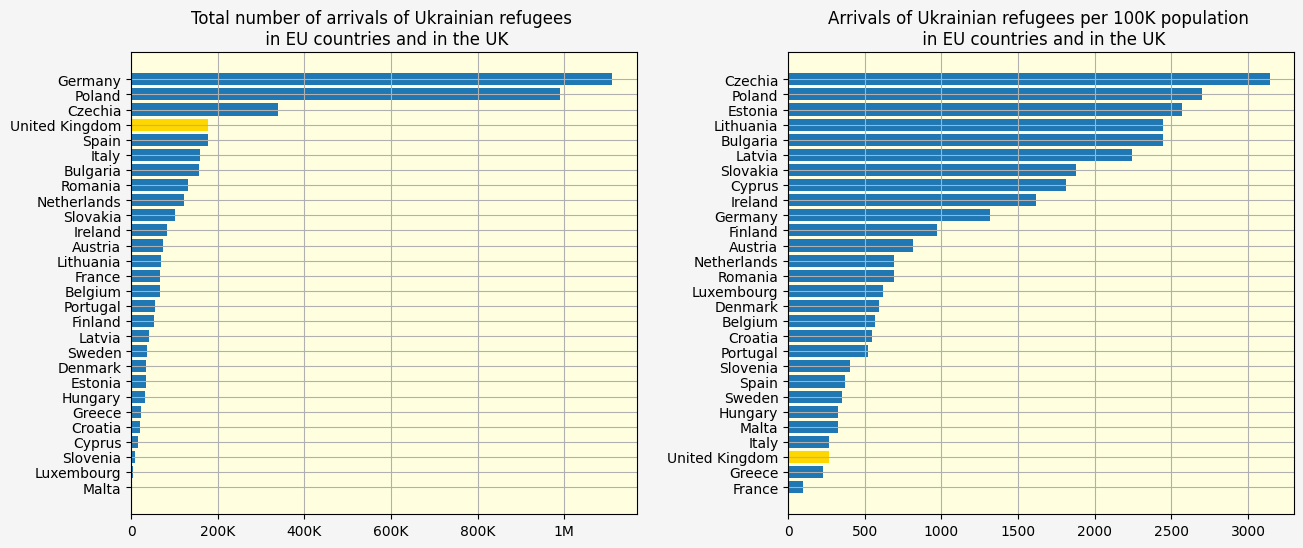

In [ ]:
uk_eu1 = uk_eu.sort_values('Arrivals from Ukraine per 100K')
fig, axs = plt.subplots(1,2, figsize=(15,6), facecolor='whitesmoke')
fig.subplots_adjust(wspace=0.3)
for n,i in uk_eu1.iterrows():
  if i["Country"] == "United Kingdom":
    axs[1].barh(i['Country'], i['Arrivals from Ukraine per 100K'], color='gold')
  else:
    axs[1].barh(i['Country'], i['Arrivals from Ukraine per 100K'], color='tab:blue')
axs[1].set_title('Arrivals of Ukrainian refugees per 100K population \n in EU countries and in the UK')
axs[1].grid()
uk_eu2 = uk_eu.sort_values('Arrivals from Ukraine')
for n,i in uk_eu2.iterrows():
  if i["Country"] == "United Kingdom":
    axs[0].barh(i['Country'], i['Arrivals from Ukraine'], color='gold')
  else:
    axs[0].barh(i['Country'], i['Arrivals from Ukraine'], color='tab:blue')
axs[0].set_title('Total number of arrivals of Ukrainian refugees \n in EU countries and in the UK')
axs[0].grid()
axs[0].ticklabel_format(style='plain', axis='x')
uk_eu2
def millions(x, pos):
  if x==0:
    return 0
  elif x>=1000000:
    return f'{str(int(x))[:1]}M'
  else:
    return f'{str(int(x))[:3]}K'
axs[0].xaxis.set_major_formatter(FuncFormatter(millions))
axs[0].set_facecolor('lightyellow')
axs[1].set_facecolor('lightyellow')
plt.show()

The two subplots demonstrate how the UK arrivals compare to arrivals in 27 EU countries. While in absolute numbers the UK is in the top 5 approximately equal to Spain's numbers, in the number of arrivals per 100,000 the UK is in the bottom 5 approximately equal to Italy's stats.

I read the Github link to a file that I downloaded using the link below https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/datasets/mappingincomedeprivationatalocalauthoritylevel. I could not read it directly from the source due to the restictions set. The file contained data on income deprivation in England. I selected the sheet with data on average income deprivation score by local authority. I renamed a column in this dataframe and inner joined it with the dataframe on arrivals from Ukraine using the ONS code as a key. This resulted in a dataframe that contained data on arrivals from Ukraine sponsored by a member of the public in England since we used inner join. I then created a scatter plot showing correlation between the average income deprivation score and the number of arrivals from Ukraine per 100,000 population by local authority. I added a linear regression trend line to showcase the correlation.

In [ ]:
deprivation_e = pd.read_excel('https://github.com/yuliiabosher/Python-with-Data-course/raw/main/localincomedeprivationdata.xlsx', sheet_name='Local authorities')
deprivation_e = deprivation_e.rename(columns = {'Local Authority District code (2019)': 'ONS code'})
deprivation_e = county_joined.join(deprivation_e.set_index('ONS code'), on ='ONS code', how='inner')
display(deprivation_e.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Local authority name                                                   306 non-null    object 
 1   ONS code                                                               306 non-null    object 
 2   Applications                                                           306 non-null    object 
 3   Visas                                                                  306 non-null    object 
 4   Arrivals                                                               306 non-null    float64
 5   Country                                                                306 non-null    object 
 6   Scheme type                                                            306 non-null    obj

None

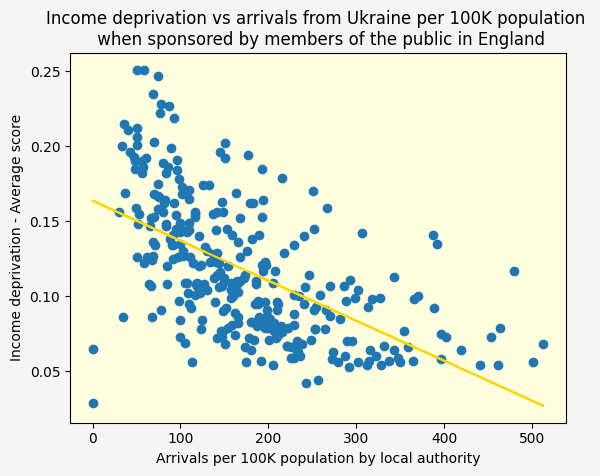

In [ ]:
ave_score = deprivation_e['Income deprivation- Average score ']
arrivals_100K = deprivation_e['Arrivals per 100K']
fig, axs = plt.subplots(facecolor='whitesmoke')
plt.scatter(arrivals_100K, ave_score)
plt.ylabel('Income deprivation - Average score')
plt.xlabel('Arrivals per 100K population by local authority')
axs.set_facecolor('lightyellow')
r = linregress(arrivals_100K, ave_score)
s = r.slope
inter = r.intercept
plt.plot(arrivals_100K, s*arrivals_100K+inter, color='gold')
plt.title('Income deprivation vs arrivals from Ukraine per 100K population \n when sponsored by members of the public in England')
plt.show()

The scatter plot and the trend line demonstrate strong correlation between  average score of income deprivation and arrivals per 100,000 population by local authority in England. The lower income deprivation average score, the higher number of arrivals sponsored by a member of the public.

# Summary
I discovered that the arrivals from Ukraine peaked in spring 2022. The biggest share of arrivals across the UK was sponsored by a member of the public. The majority of arrivals have been working age and among those the majority have been women. The devolved government scheme allowed Scotland to increase absolute number of arrivals fivefold, fourfold relative to population while being open only in spring and summer 2022. The top local authorities for arrivals in England are far ahead the top local authorities in Scotland, Wales and Northern Ireland. When sponsored by public members three three quarters of local authorities across the UK have between 100 and 200 arrivals. The UK is in the top 5 countries by total number of arrivals and is in the bottom 5 among EU countries + the UK list. The lower the income deprivation average score per local authority have been, the more arrivals have been sponsored by members of the public in England.

I have practised to read Open Document, Excel, CSV format files from an original source or uploaded to Github. I have learned to skip rows when reading files, drop unnecessary rows, drop, create and rename columns, set columns as index, concatenate dataframes, create dataframes from dictionaries, transpose tables, join tables using a key column. I learned how to create bar charts, pie charts, boxplots, scatter plots, line plots, plot a linear regression line. I have learned to create symmetrical and assymetrical subplots, share an axis between subplots, add x-ticks to subplots, add titles to subplots and a super title to a plot. I have learned to change font size in plots, change colours, including highlighting one bar in a bar chart. I have learned to reuse functions I created.